In [18]:
import importlib
import modules
from collections import Counter
import numpy as np
import powerlaw
import importlib
import modules
import pickle
from modules import calculate_flow_nasch
from modules import nasch_step
from modules import initial_state_nasch
from modules import run_model_stochastic

import cellpylib as cpl

from modules import triangulize_evolution
from modules import find_jams
import matplotlib.pyplot as plt

from modules import run_model_stochastic
import random
import sys

importlib.reload(modules)


<module 'modules' from '/Users/carokluin/Documents/CSM/ComplexSystems/Project_complexsystems/CSS-Group1/modules.py'>

In [1]:

p = 0.2
L = 300
T = int(L/2)
n = 100

# NaSch parameters
p_slowdown = 0.4
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

current_state = initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=True, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=True, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


def power(x,b):
    return x**(-b)

file = open('Results/loglog_jam_dynamic_critical.txt', 'wb')
pickle.dump(jam_size_counter, file)
file.close()

In [19]:
def analyze_powerlaw_distribution(data):
    """
    Function that analysis the distribution of given data with the powerlaw package.
    Makes use of the Kolmogorov-Smirnov test which returns R-log likelihood (ks_stat) and p-value (ks_p_value). 
    p-value/ks_p_value > 0.05 means that the data is likely to be drawn from the same distribution.
    R/ks_stat <0  means the data is drawn from a exponential distribution
    R/ks_stat >0 means the data is drawn from a power law distribution 


    Input: data (array-like)
    Output: string with distribution type

    """
    #Make data in array format
    data = np.asarray(data)

    #Fit to a power-law distribution
    fit = powerlaw.Fit(data, discrete=True)

    #Goodness of fit using the Kolmogorov-Smirnov test for power-law vs. exponential
    distr1 = "power_law"
    distr2 = "exponential"
    ks_stat, ks_p_value = fit.distribution_compare(distr1, distr2, normalized_ratio=True)
    exponent = fit.power_law.alpha
    

    # Analyze the fit and return the result
    if ks_stat > 0:
        # R log likelihood was positive, so data prefers power-law distribution
        result = f"Data prefers {distr1} over {distr2} (p-value: {ks_p_value:.4f})"

    else:
        # R log likelihood was negative, so data prefers exponential distribution
        result = f"Data prefers {distr2} over {distr1} (p-value: {ks_p_value:.4f})"

    return result, exponent

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.760266533033647


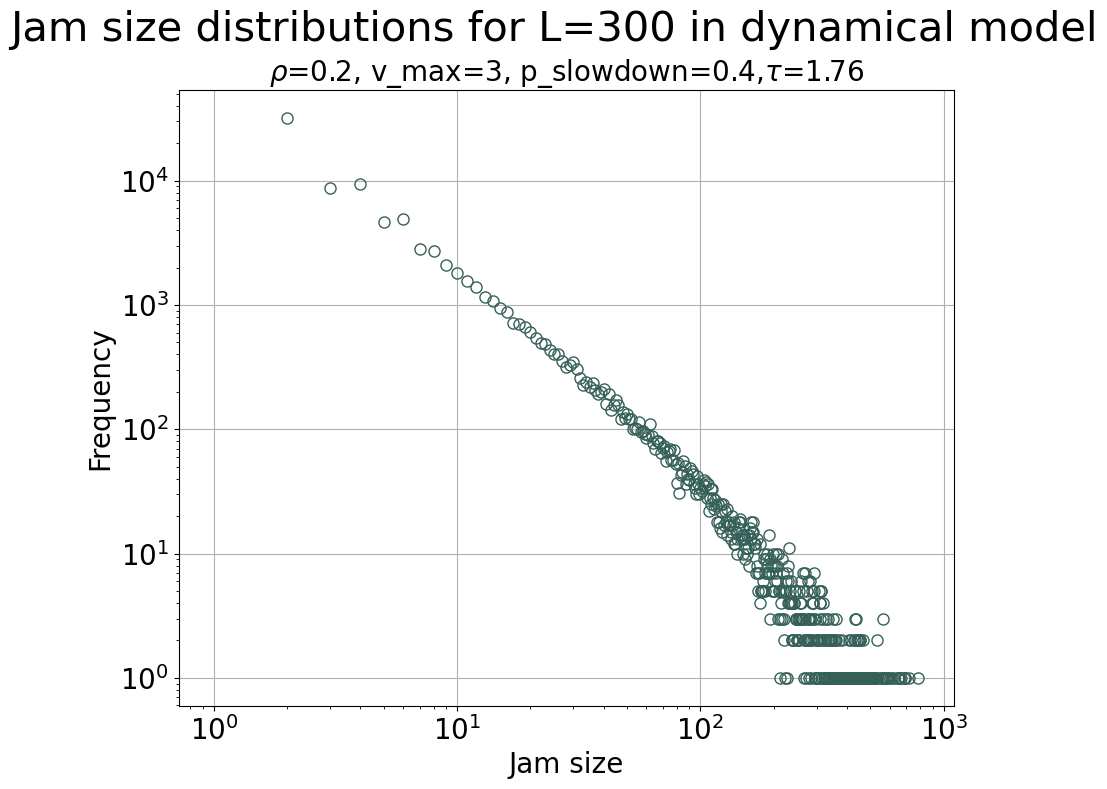

In [6]:
file = open('Results/loglog_jam_dynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)
 

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={round(exponent,2)}', fontsize=20)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.suptitle(f'Jam size distributions for L={L} in dynamical model', fontsize=30)
plt.show()

In [10]:
import sys
sys.setrecursionlimit(10000)

#Critical densities for p_slowdown and vmax
#0.4482758620689655,3,"[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2413793103448276, 0.22068965517241382, 0.2, 0.2]

p = 0.2
L = 300
T = int(L/2)
n = 100

# NaSch parameters
p_slowdown = 0.4
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

current_state = initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=False, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=False, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


def power(x,b):
    return x**(-b)


file = open('Results/loglog_jam_nondynamic_critical.txt', 'wb')
pickle.dump(jam_size_counter, file)
file.close()

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.9312769406656582


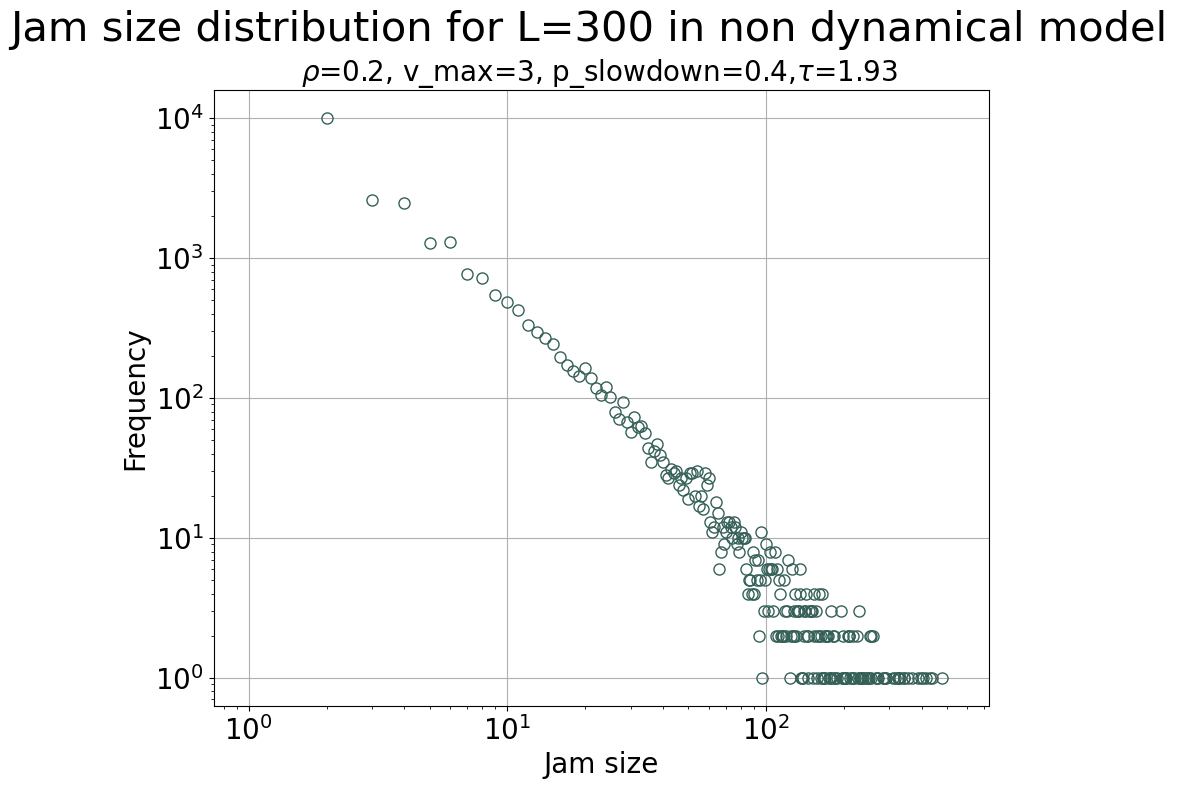

In [13]:
file = open('Results/loglog_jam_nondynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)
 

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)


plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={round(exponent,2)} ', fontsize=20)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in non dynamical model', fontsize=30)
plt.show()

In [26]:
import sys
sys.setrecursionlimit(10000)

p = 0.22068965517241382
L = 300
T = int(L/2)
n = 100

# NaSch parameters
p_slowdown = 0 
v_max = 1 

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01


current_state = initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=False, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=False, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


def power(x,b):
    return x**(-b)

file = open('Results/loglog_jam_CA_critical.txt', 'wb')
pickle.dump(jam_size_counter, file)
file.close()

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.9854)
4.216223386113601


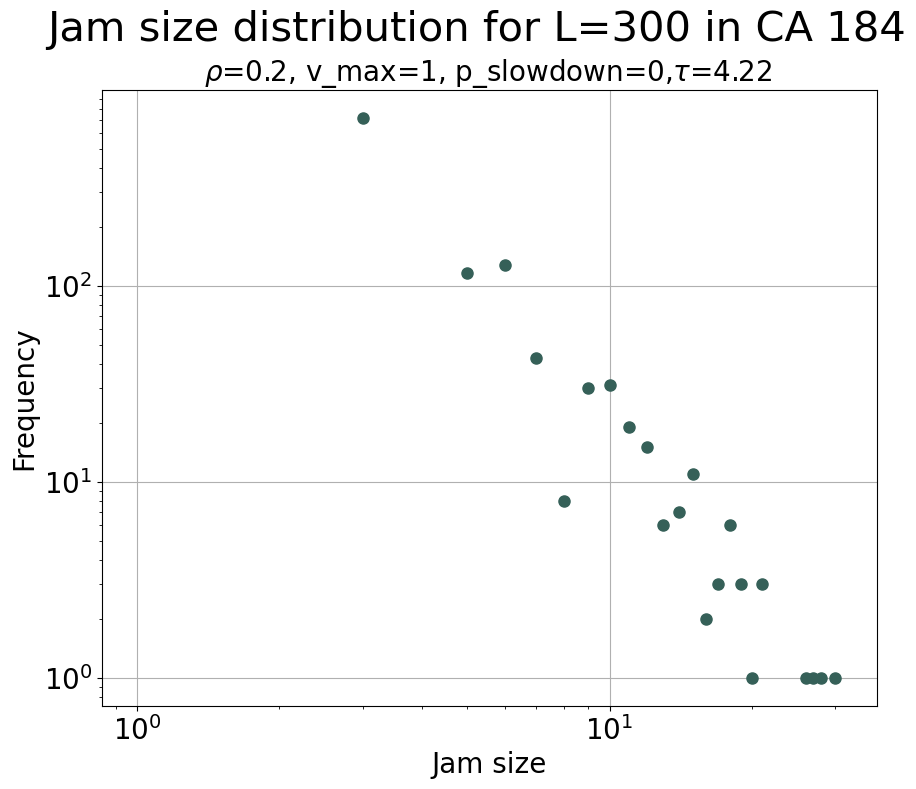

In [28]:
file = open('Results/loglog_jam_CA_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

#check for powerlaw and make loglog plot for visualisation
result, exponent = analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o',markerfacecolor='#356058', markeredgecolor='#356058', markersize=8)


plt.grid()
plt.title(f'$\\rho$={0.2}, v_max={1}, p_slowdown={0},$\\tau$={round(exponent,2)} ', fontsize=20)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in CA 184', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

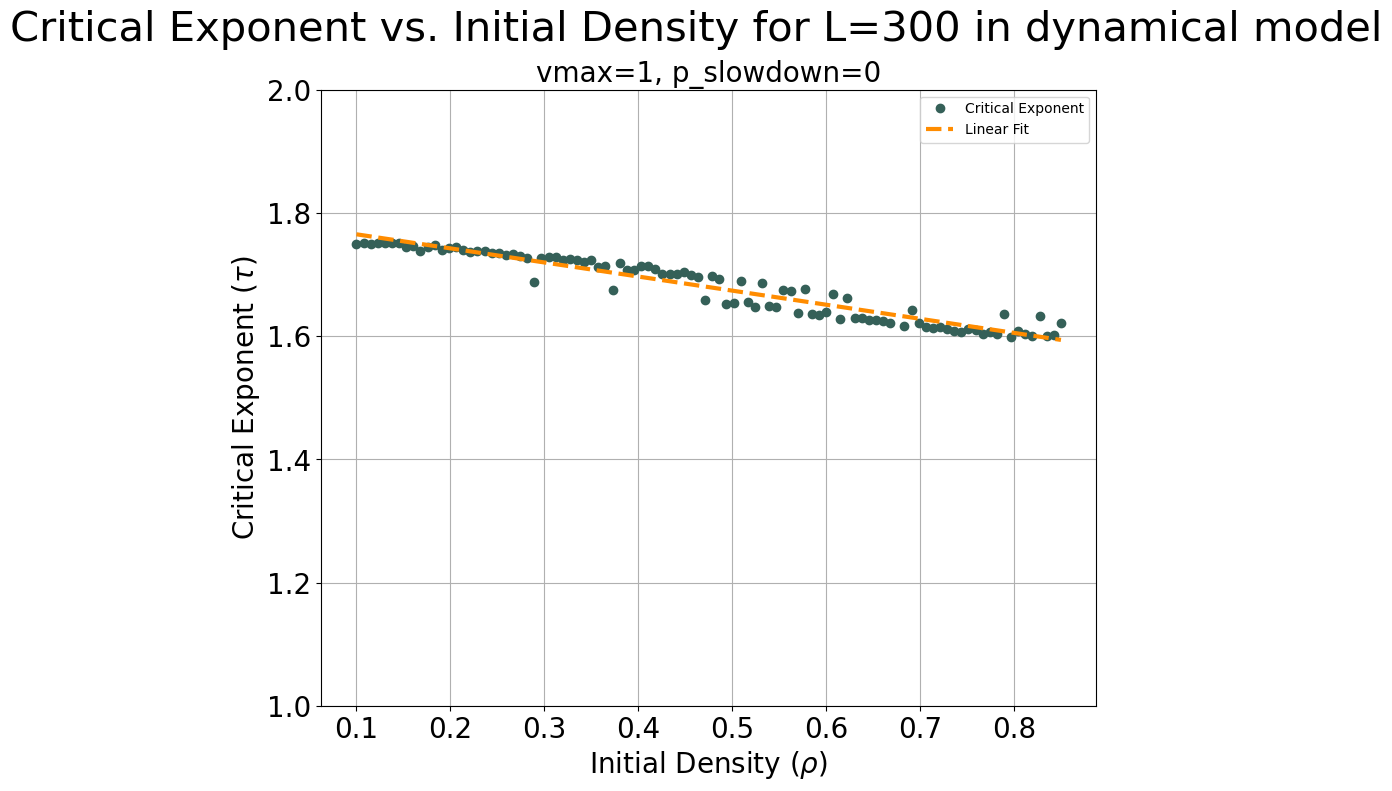

In [39]:
# Visualize Results
file = open('Results/densities_density_dynamic_pslow08.txt', 'rb')
results = pickle.load(file)

# Remove outliers
results = [r for r in results if r[1] < 2]

# Unpack Results
densities, exponents = zip(*results)
fit_params = np.polyfit(densities, exponents, 1)
fit_line = np.polyval(fit_params, densities)

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(densities, exponents, 'o', color='#356058',linewidth=3,label='Critical Exponent')
plt.plot(densities, fit_line, '--', color='darkorange', linewidth=3, label='Linear Fit')
plt.xlabel('Initial Density ($\\rho$)', fontsize=20)
plt.ylabel('Critical Exponent ($\\tau$)', fontsize=20)
plt.title(f'vmax={v_max}, p_slowdown={p_slowdown}', fontsize=20)
plt.suptitle(f'Critical Exponent vs. Initial Density for L={L} in dynamical model', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(1,2)
plt.legend()
plt.show()